Solving the [2023 Week 4 Homework](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/04-evaluation/homework.md)

# Section 1

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
cars = pd.read_csv('data/car-price.csv')
cars.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [3]:
cols = [
    "Make",
    "Model",
    "Year",
    "Engine HP",
    "Engine Cylinders",
    "Transmission Type",
    "Vehicle Style",
    "highway MPG",
    "city mpg",
    "MSRP",
]

data = cars[cols].copy()
data.columns = data.columns.str.lower().str.replace(" ", "_")

data.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [5]:
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [6]:
avg_price = data.msrp.mean()
avg_price

40594.737032063116

In [7]:
data['above_average'] = (data.msrp > avg_price).astype(int)
data.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1


In [8]:
del data['msrp']
data.head(2)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1


In [10]:
fulltrain_data, test_data = train_test_split(data, test_size=0.2, random_state=1)
train_data, val_data = train_test_split(fulltrain_data, test_size=0.25, random_state=1)

len(fulltrain_data), len(train_data), len(test_data)

(9531, 7148, 2383)

# Section 2

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Question 1

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that

If your AUC is < 0.5, invert this variable by putting "-" in front

Which numerical variable has the highest AUC?

In [18]:
for col in train_data.select_dtypes('number').columns:
    auc = roc_auc_score(train_data['above_average'], train_data[col])
    if auc<0.5:
        auc = roc_auc_score(train_data['above_average'], -train_data[col])
    print(col, round(auc, 3))

year 0.688
engine_hp 0.917
engine_cylinders 0.766
highway_mpg 0.633
city_mpg 0.673
above_average 1.0


**Answer**: `engine_hp`

## Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset?

In [22]:
X_train = train_data.copy()
y_train = X_train.pop('above_average')

train_dicts = X_train.to_dict(orient='records')
train_dicts[0]

{'make': 'Toyota',
 'model': 'Highlander Hybrid',
 'year': 2016,
 'engine_hp': 280.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 28,
 'city_mpg': 27}

In [24]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

len(X_train[0])

954

In [25]:
len(dv.feature_names_)

954

In [26]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [31]:
X_val = val_data.copy()
y_val = X_val.pop('above_average')

val_dicts = X_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_hat = model.predict_proba(X_val)[:, 1]
len(val_data), len(y_hat)

(2383, 2383)

In [32]:
y_hat[:5]

array([6.73457383e-01, 7.21739094e-03, 3.44871088e-01, 8.53010425e-02,
       3.09239902e-05])

In [34]:
auc = roc_auc_score(y_val, y_hat)
round(auc, 3)

0.979

**Answer**: 0.979

## Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

In [36]:
def precision_recall(y_true, y_pred):
    """
    Returns the precision and recall for 
    the true classes and predicted classes passed.
    """

    # precision is the fraction of positive predictions which are correct
    precision = y_true[y_pred==1].mean()

    # recall is the fraction of actual positives which are correctly predicted
    recall = y_pred[y_true==1].mean()
    
    return precision, recall

In [37]:
y_pred = (y_hat > 0.5).astype(int)

precision_recall(y_val, y_pred)

(0.8864696734059098, 0.8715596330275229)

In [38]:
thresh = np.arange(0, 1.01, 0.01)  # creates an array from 0 to 1, with step size of 0.01 
p = []
r = []

for t in thresh:
    y_pred = (y_hat > t).astype(int)  # if predicted probability > t, assigns positive class 
    precision, recall = precision_recall(y_val, y_pred)
    p.append(precision)
    r.append(recall)


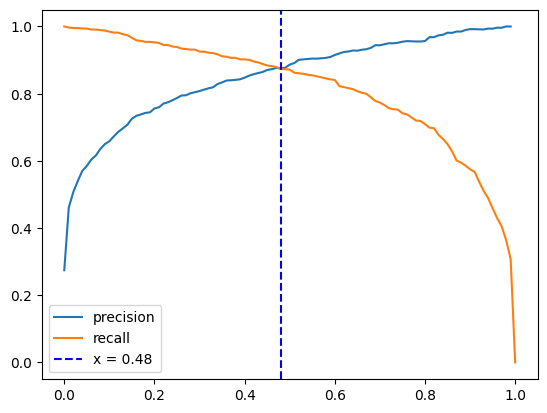

In [44]:
plt.plot(thresh, p, label='precision')
plt.plot(thresh, r, label='recall')
# plt.ylim(0.6, 1.0)
# plt.xlim(0.25, 0.75)
plt.axvline(x=0.48, color='b', ls='--', label='x = 0.48')
plt.legend();

**Answer**: 0.48

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

In [45]:
print('precision\n', p[:5])
print()
print('recall\n', r[:5])

precision
 [0.27444397817876626, 0.4611032531824611, 0.5070093457943925, 0.5402489626556016, 0.5701754385964912]

recall
 [1.0, 0.9969418960244648, 0.9954128440366973, 0.9954128440366973, 0.9938837920489296]


In [48]:
hm = lambda p, r: 2*p*r / (p + r)
hm(0.2744, 1.0)

0.43063402385436284

In [50]:
f1s = [hm(p[i], r[i]) for i in range(len(p))]
f1s[:5]

[0.43068817912413565,
 0.6305609284332688,
 0.6718266253869969,
 0.7003765465303927,
 0.7246376811594203]

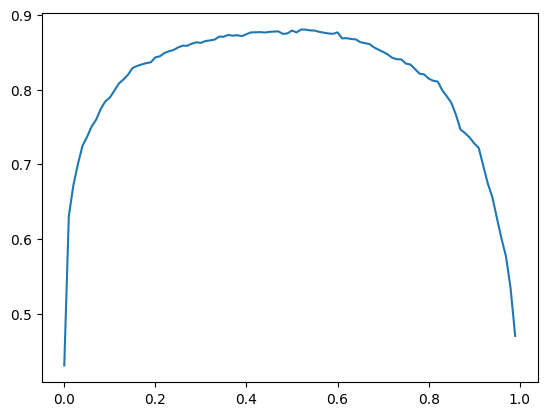

In [51]:
plt.plot(thresh, f1s);

In [54]:
max_f1 = max(f1s)
max_f1

0.8803752931978108

In [55]:
thresh[f1s == max_f1]  # thresholds with highest F1 scores

array([0.52])

**Answer**: 0.52

# Section 3

In [63]:
from typing import List
from tqdm import tqdm
from sklearn.model_selection import KFold

## Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard devidation of the scores across different folds?

In [61]:
def kfold_roc_auc_scores(k:int =5, C:int =1.0) -> List[float]:
    """
    Returns a list of ROC AUC scores, based on k and C values.
    """
    
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    scores = []
    
    for train_index, val_index in kf.split(fulltrain_data):
        
        # creates train val splits from data using indices from KFold
        X_train_fold = fulltrain_data.iloc[train_index].copy()
        y_train_fold = X_train_fold.pop('above_average')
        X_val_fold = fulltrain_data.iloc[val_index].copy()
        y_val_fold = X_val_fold.pop('above_average')
    
        # model init
        dv = DictVectorizer(sparse=False)
        lr = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    
        # trains model
        X_train_fold_dicts = X_train_fold.to_dict(orient='records')
        X_train_fold_dicts = dv.fit_transform(X_train_fold_dicts)
        lr.fit(X_train_fold_dicts, y_train_fold)
    
        # predictions
        X_val_fold_dicts = X_val_fold.to_dict(orient='records')
        X_val_fold_dicts = dv.transform(X_val_fold_dicts)
        y_hat_fold = lr.predict_proba(X_val_fold_dicts)[:, 1]
        
        score = roc_auc_score(y_val_fold, y_hat_fold)

        scores.append(score)

    return scores


In [62]:
scores = kfold_roc_auc_scores()
round(np.std(scores), 3)

0.003

**Answer**: 0.003

## Question 6: Hyperparemeter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

In [64]:
C_values = [0.01, 0.1, 0.5, 10]
scores = []

for c in tqdm(C_values):
    scores_fold = kfold_roc_auc_scores(C=c)
    scores.append((np.mean(scores_fold), np.std(scores_fold)))

for i, j in zip(C_values, scores):
    print("C=%4s, mean=%.3f, std=%.3f" % (i, j[0], j[1]))

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.14it/s]

C=0.01, mean=0.952, std=0.002
C= 0.1, mean=0.972, std=0.002
C= 0.5, mean=0.978, std=0.001
C=  10, mean=0.983, std=0.003


**Answer**: 10